In [6]:
# 8th

!pip install opencv-contrib-python

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'D:\\Anaconda_3\\Lib\\site-packages\\cv2\\cv2.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [12]:
import cv2
import skimage
import matplotlib.pyplot as plt
from skimage.transform import resize

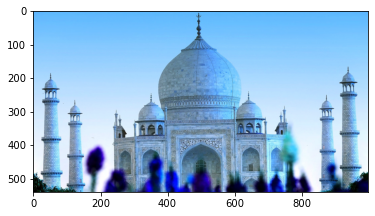

In [2]:
img1 = cv2.imread("./datasets/images/taj_small.jpg")

plt.figure(figsize = (6,6))
plt.imshow(img1)

In [3]:
# convert colored image to gray, for faster feature detection op
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [5]:
sift = cv2.xfeatures2d.SIFT_create()  

In [7]:
kp1 = sift.detect(gray1, None)     # gets keypoints in image

In [8]:
# draw the keypoints
img1 = cv2.drawKeypoints(gray1, kp1, outImage = None)

In [9]:
cv2.imwrite("sift_keypoints.jpg", img1)

True

In [23]:
from skimage import io

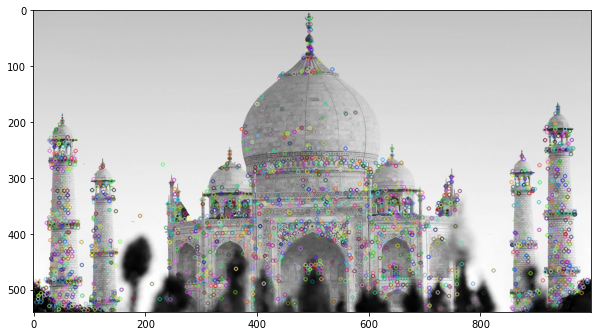

In [25]:
sift_keypoints = io.imread("sift_keypoints.jpg")

plt.figure(figsize = (10, 10))
plt.imshow(sift_keypoints, cmap = "gray")

In [26]:
# since previous keypoint draws all, key points, this draws only rich keypoints
img2 = cv2.drawKeypoints(gray1, kp1, outImage = None, flags = cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imwrite("rich_sift_keypoints.jpg", img2)

True

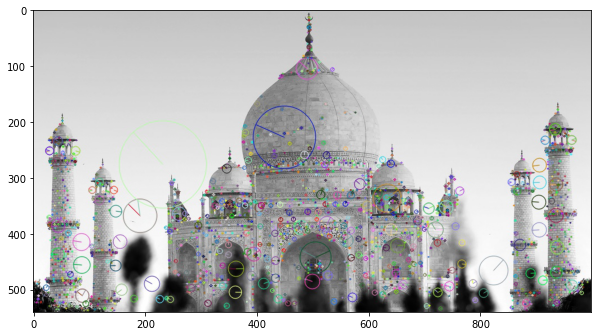

In [27]:
rich_sift_keypoints = io.imread("rich_sift_keypoints.jpg")

plt.figure(figsize = (10, 10))
plt.imshow(rich_sift_keypoints, cmap = "gray")

# the larger the circle, the larger the scale at which this keypoint was detected.

In [28]:
# match keypoints across images using a descriptor(holds info about keypoints oreientation and scale)
kp1, des1 = sift.compute(gray1, kp1)

In [30]:
# use descriptors and keypoints to find matching features btw images
img2 = cv2.imread("./datasets/images/taj_mahal_india.jpg")

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [31]:
kp2, des2 = sift.detectAndCompute(gray2, None)  # gets keypoint and desc from 2nd image

In [32]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck =True)
matches = bf.match(des1, des2)

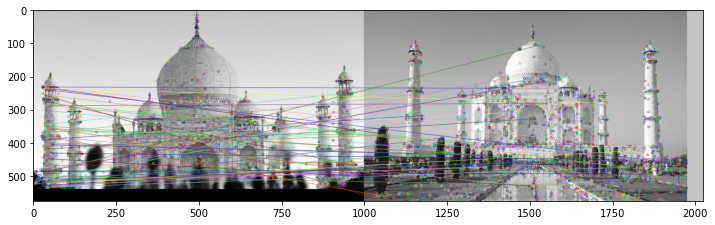

In [35]:
# draw the TOP 50 matches
N_MATCHES = 50

match_img = cv2.drawMatches(
    gray1, kp1,
    gray2, kp2,
    matches[:N_MATCHES], gray2.copy(), flags = 0
)

plt.figure(figsize = (12, 12))
plt.imshow(match_img)